# Report Plots

In [14]:
# Imports

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

### Dataset Example Images

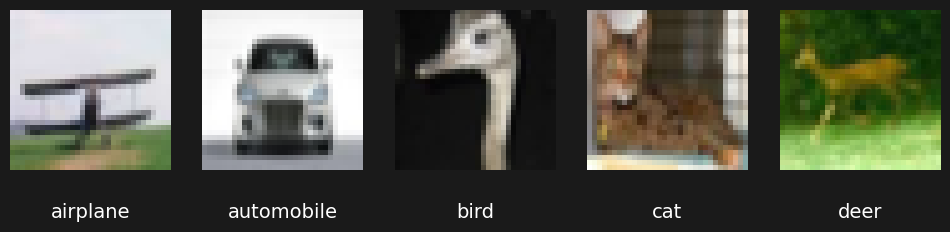

In [15]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

fig, axes = plt.subplots(1, 5, figsize = (12, 3), facecolor = '#1a1a1a')
fig.patch.set_facecolor('#1a1a1a')

for i, ax in enumerate(axes):
    indices = np.where(y_train == i)[0]
    random_index = np.random.choice(indices)
    ax.imshow(x_train[random_index])
    ax.set_axis_off()
    ax.text(0.5, -0.3, class_names[i], fontsize = 14, ha = 'center', color = 'white', transform = ax.transAxes)

plt.show()

### Dataset Class Distribution

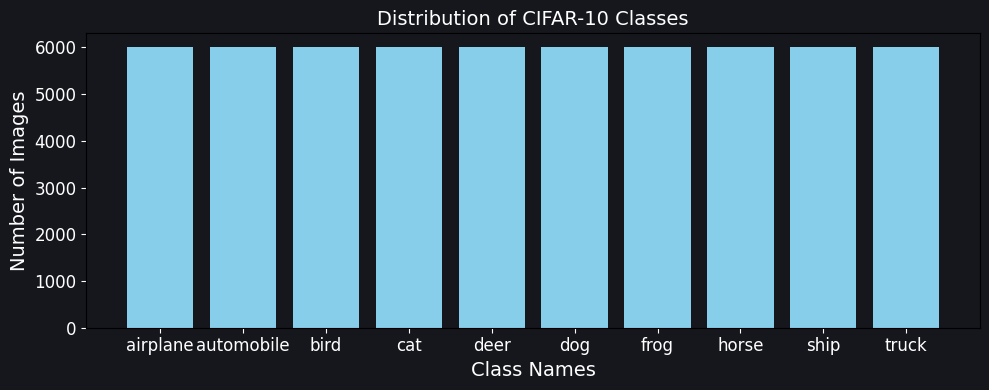

In [16]:
y_total = np.concatenate([y_train, y_test])

class_counts = np.bincount(y_total.flatten())

fig, ax = plt.subplots(figsize = (10, 4), facecolor = '#16171d')

ax.bar(class_names, class_counts, color = 'skyblue')
ax.set_xlabel('Class Names', fontsize = 14, color = 'white')
ax.set_ylabel('Number of Images', fontsize = 14, color = 'white')
ax.set_title('Distribution of CIFAR-10 Classes', fontsize = 14, color = 'white')
ax.set_facecolor('#16171d')
ax.tick_params(colors = 'white', labelsize = 12)

plt.tight_layout()
plt.show()